# Image Operation With OpenCV

## 01. Import and Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, sys


# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)

from mansoor import Repeatable

### Create an instance of Repeater

In [2]:
r = Repeatable(300,300, base_path='../../data/images/') # It have functions that we need to do Repeatedly

## 02. Image Scaling

### Load Image

In [3]:
img = r.load_image('1.jpg')

### Resize Image

In [4]:
resize_img = cv2.resize(img, (100, 100))

### Show Original and Resized Image

Image 1 shape: (727, 720, 3)
Image 2 shape: (100, 100, 3)


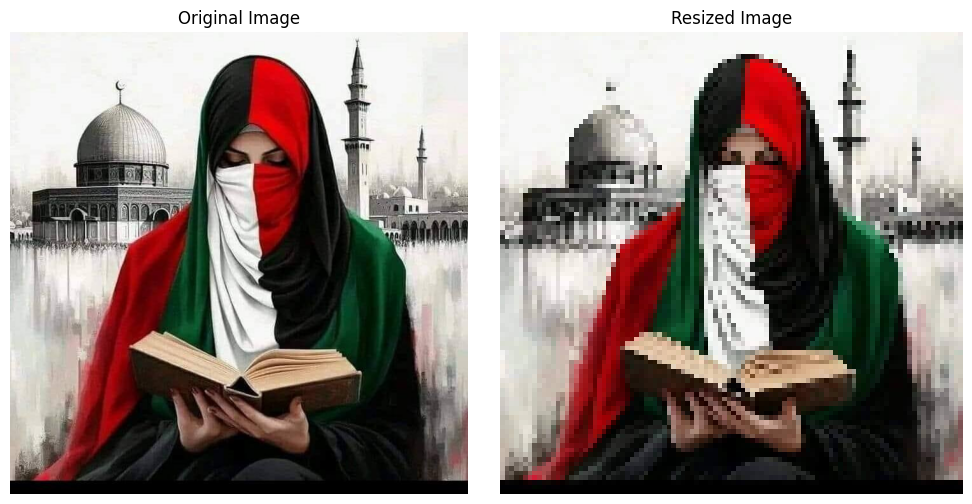

In [5]:
r.shape_of_images(img, resize_img)
r.show_multiple_images((img, resize_img), titles=('Original Image', 'Resized Image'), cols=2, resize=False) 

### Show Both Images Through OpenCV Imshow

##### `By displaying image through Matplotlib, It is not showing too much Difference. So Lets Display Them Through OpenCV`

In [6]:
r.showImagesThroughOpenCV([img,resize_img], ['Original Image', 'Resized Image'])

## 03. Image Rotating

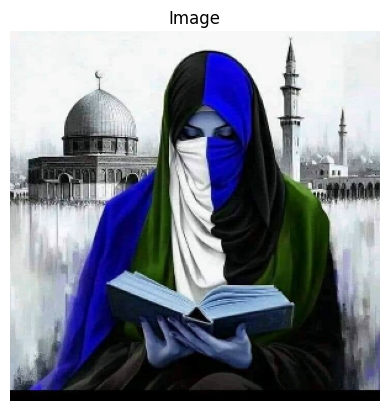

In [7]:
r.showImage(img)

### Get Height and Width Of Image

In [8]:
h, w = img.shape[:2]

### `cv2.getRotationMatrix2D()`

In [9]:
# Create mask through getRotationMatrix2D()
mask = cv2.getRotationMatrix2D(center = (w//2, h//2), angle=140, scale=1)

In [10]:
mask

array([[-7.66044443e-01,  6.42787610e-01,  4.02444097e+02],
       [-6.42787610e-01, -7.66044443e-01,  8.72477672e+02]])

### `cv2.warpAffine`

In [11]:
new_img = cv2.warpAffine(src=img, M=mask, dsize=(h,w), borderMode=cv2.BORDER_REFLECT_101, borderValue=3)

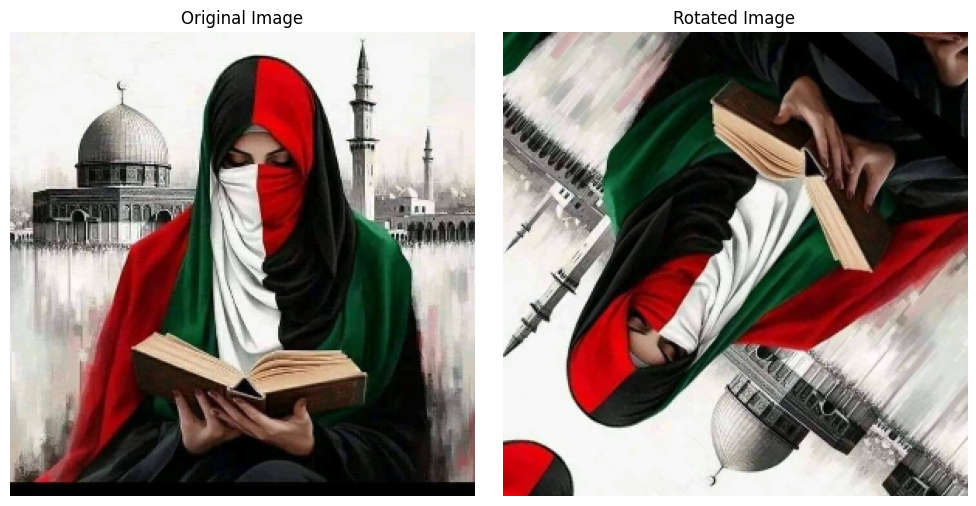

In [12]:
r.show_multiple_images((img,new_img), titles=("Original Image", "Rotated Image"), cols=2)

## 04. Image Blurring

### Gaussian Blur

#### Load an Image

In [13]:
img = r.load_image()

In [14]:
g = cv2.GaussianBlur(src=img, ksize=(11,11), sigmaX=1)

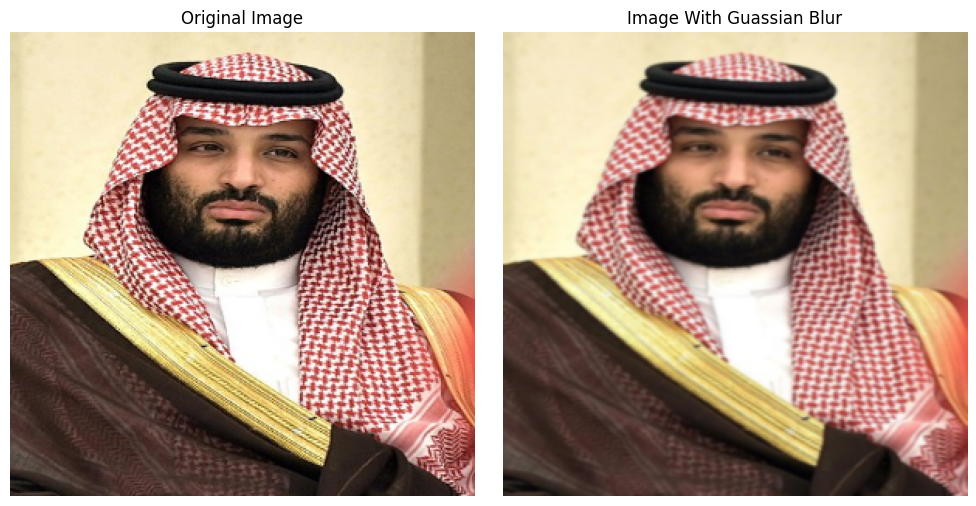

In [15]:
r.show_multiple_images((img, g), titles=("Original Image", "Image With Guassian Blur"), cols=2)

### Median Blur

In [16]:
star_img = r.load_image('OIP.jpg')
star_median_blurred = cv2.medianBlur(src=star_img, ksize=7)

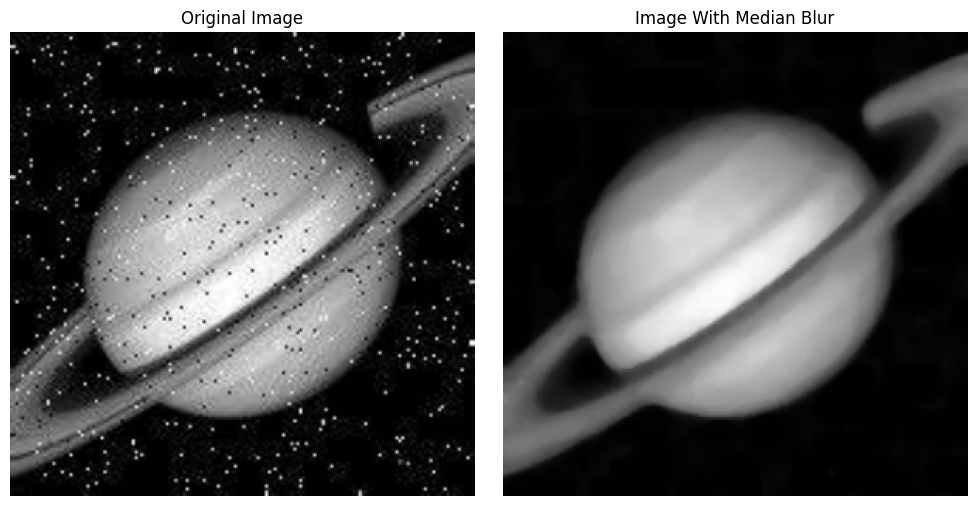

In [17]:
r.show_multiple_images((star_img, star_median_blurred), titles=("Original Image", "Image With Median Blur"), cols=2)

In [18]:
tiger = r.load_image('OIP (1).jpg')
tiger_median_blurred = cv2.medianBlur(src=tiger, ksize=5)

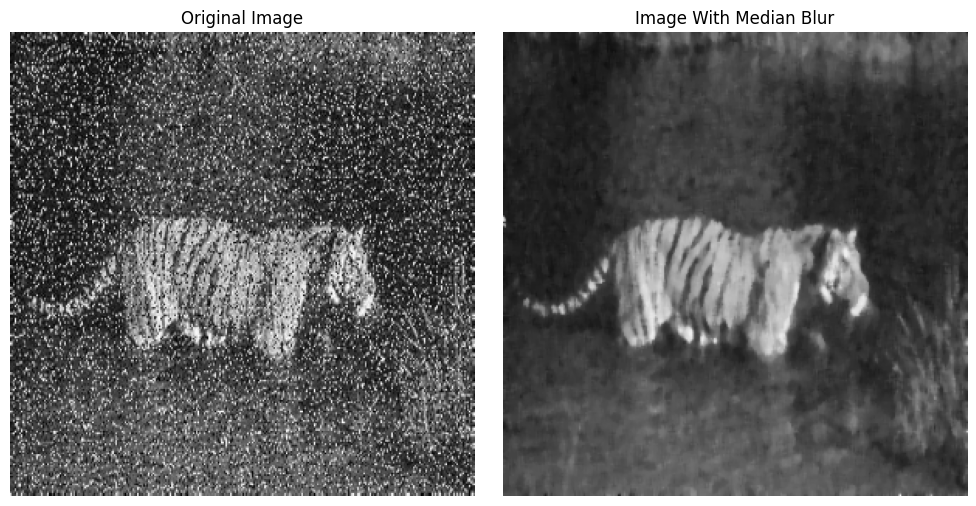

In [19]:
r.show_multiple_images((tiger, tiger_median_blurred), titles=("Original Image", "Image With Median Blur"), cols=2)

In [20]:
girl = r.load_image('saltandpepperlena.jpg')
girl_median_blurred = cv2.medianBlur(src=girl, ksize=7)

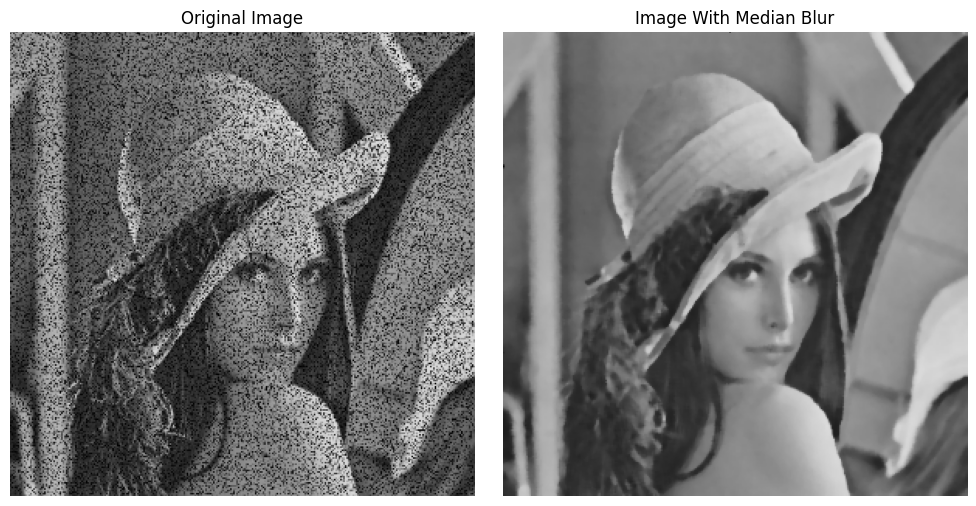

In [21]:
r.show_multiple_images((girl, girl_median_blurred), titles=("Original Image", "Image With Median Blur"), cols=2)

#### Merge These Images and Show Column Wise

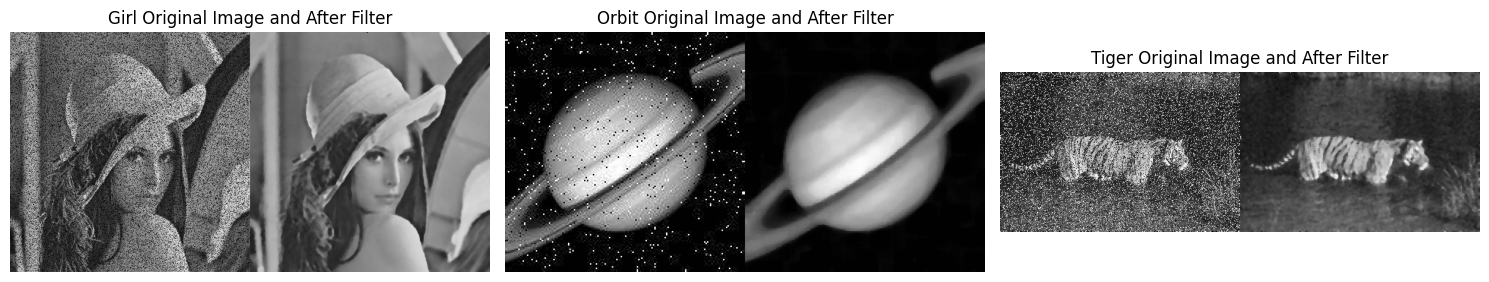

In [22]:
girl_image = np.hstack((girl, girl_median_blurred))
star_images = np.hstack((star_img,star_median_blurred))
tiger_images = np.hstack((tiger, tiger_median_blurred))
titles = ["Girl Original Image and After Filter", "Orbit Original Image and After Filter", "Tiger Original Image and After Filter"]
r.show_multiple_images((girl_image, star_images, tiger_images), resize=False, titles=titles)

## BilateralFilter

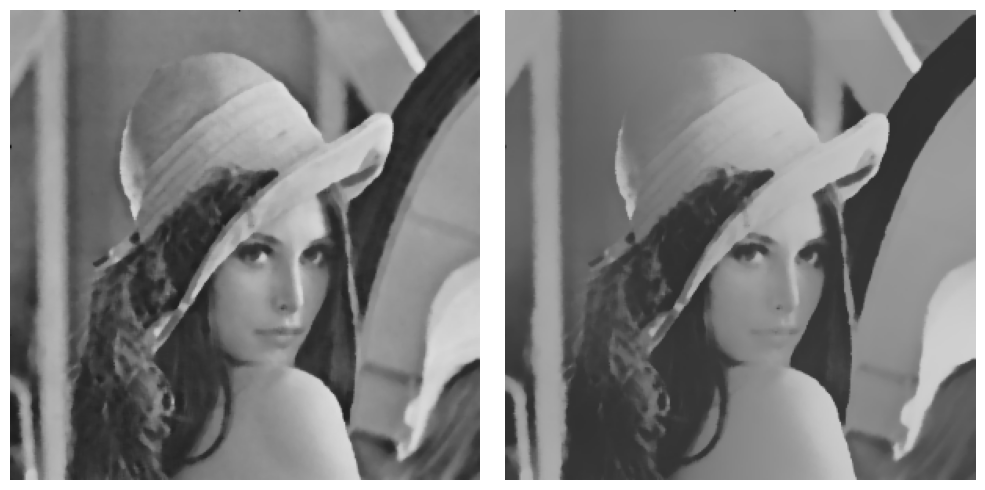

In [26]:
bilerral = cv2.bilateralFilter(src=girl_median_blurred, d=100, sigmaColor=75, sigmaSpace=150)
r.show_multiple_images((girl_median_blurred, bilerral))